In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
df.duplicated().sum()

1

In [10]:
df1=df.drop_duplicates()

In [11]:
X = df1.drop(columns=['species']) 

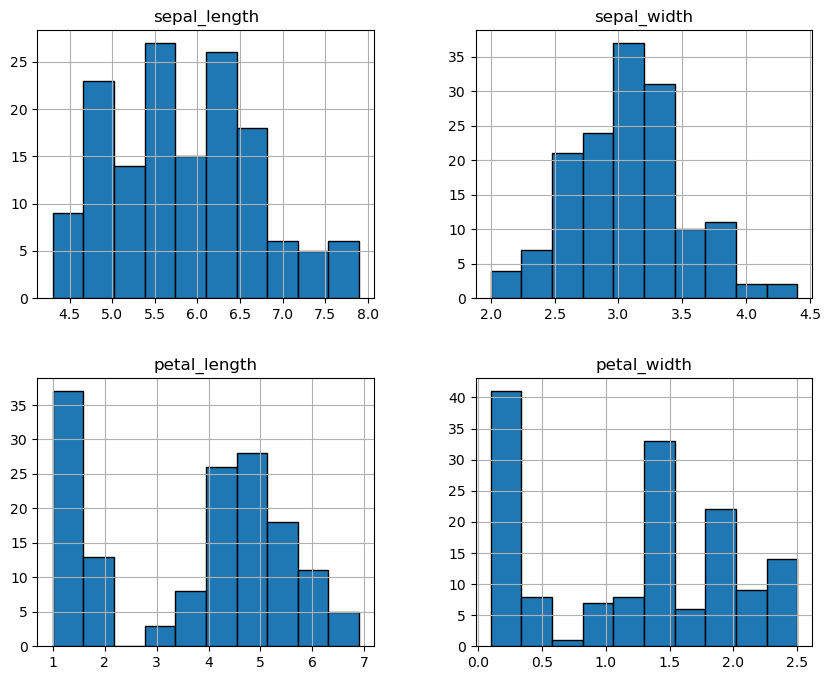

In [12]:

df1.hist(figsize=(10,8),bins=10,edgecolor='k')
plt.show()

In [13]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

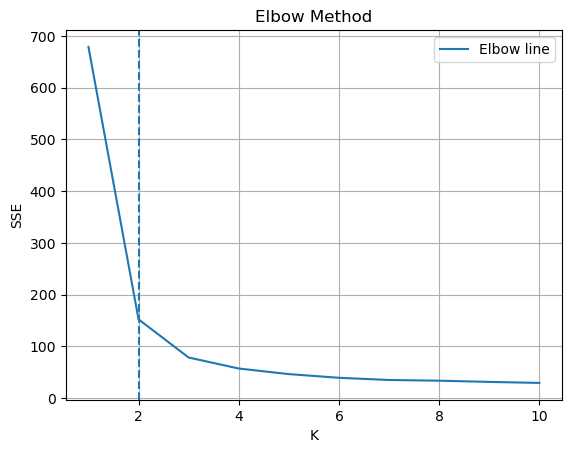

In [14]:
plt.plot(range(1,11), wcss,label='Elbow line')
plt.axvline(2,linestyle='--')
plt.xlabel('K')
plt.ylabel("SSE")
plt.grid()
plt.legend()
plt.title("Elbow Method")
plt.show()


In [15]:
X = df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans.fit(X)


c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [16]:
pred = kmeans.predict(X)
pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0])

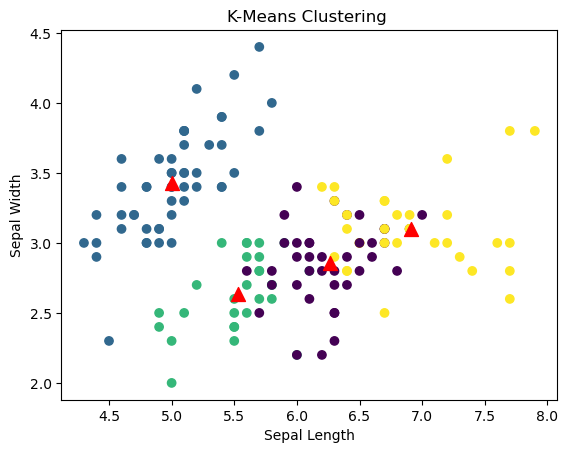

In [17]:
plt.scatter(X.iloc[:, 0],X.iloc[:, 1],c=pred,cmap='viridis',marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='^')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering ')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
print(f"Silhouette Score :{silhouette_score(X,pred)}")

Silhouette Score :0.4987644322355142


In [19]:
new_data = [[5.5, 3.0, 4.5, 1.5]]  
predict_cluster = kmeans.predict(new_data)
print(f"The new data {new_data} belongs to cluster {predict_cluster[0]}")



The new data [[5.5, 3.0, 4.5, 1.5]] belongs to cluster 2


c:\Users\racha\anaconda4\anaconda1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
